## preprocess.ipynb
これはcsvファイルの前処理用のNotebookです

In [3]:
import sys
sys.path.append("../../")
sys.path.append("../../../")

In [4]:
import os
from PIL import Image
from torchvision import transforms
import pandas as pd
import torch
import timm
import pickle
from torch import nn

/root/.venv/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [47]:
df = pd.read_csv("./All Appliances_img.csv")

In [48]:
df.head()

,Unnamed: 0,name,main_category,sub_category,image,link,ratings,no_of_ratings,discount_price,actual_price,img_path
0,0,Pigeon by Stovekraft Amaze Plus Electric Kettl...,appliances,All Appliances,https://m.media-amazon.com/images/W/IMAGERENDE...,https://www.amazon.in/Pigeon-Amaze-Plus-1-5-Lt...,3.9,"128,941",₹599,"₹1,245",NaN
1,1,Pigeon Polypropylene Mini Handy and Compact Ch...,appliances,All Appliances,https://m.media-amazon.com/images/W/IMAGERENDE...,https://www.amazon.in/Pigeon-Stovekraft-Plasti...,4.1,"274,505",₹199,₹545,NaN
2,2,Glun Multipurpose Portable Electronic Digital ...,appliances,All Appliances,https://m.media-amazon.com/images/W/IMAGERENDE...,https://www.amazon.in/Multipurpose-Portable-El...,3.8,365,₹199,₹899,NaN
3,3,beatXP Kitchen Scale Multipurpose Portable Ele...,appliances,All Appliances,https://m.media-amazon.com/images/W/IMAGERENDE...,https://www.amazon.in/beatXP-Multipurpose-Port...,3.7,"3,290",₹299,"₹1,999",NaN
4,4,Bajaj DX-6 1000W Dry Iron with Advance Solepla...,appliances,All Appliances,https://m.media-amazon.com/images/W/IMAGERENDE...,https://www.amazon.in/Bajaj-Majesty-1000-Watt-...,4.2,"24,380",₹625,"₹1,400",NaN


In [49]:
df["img_path"]

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
       ... 
9571    NaN
9572    NaN
9573    NaN
9574    NaN
9575    NaN
Name: img_path, Length: 9576, dtype: object

## csvの画像以外の前処理

In [50]:
def preprocessing(input_df):
    def price2yen(input_df):
        output = input_df.copy()
        output = output.dropna(subset=["actual_price"])
        output["actual_price"] = output["actual_price"].str.strip("₹")
        output["actual_price"] = output["actual_price"].str.replace(",","").astype(float)
        output["actual_price_yen"] = output["actual_price"] * 110
        return output
    
    def no_of_rate(input_df):
        output = input_df.copy()
        output = output.dropna(subset=["no_of_ratings"])
        #文字情報が含まれている場合、エラーが発生する可能性があるため、エラーハンドリングを追加
        output["no_of_ratings"] = pd.to_numeric(output["no_of_ratings"].str.replace(",",""), errors='coerce').fillna(0).astype(int)
        return output
    
    def img_path(input_df):
        output = input_df.copy()
        output = output.dropna(subset=["img_path"])
        return output
    
    output = price2yen(input_df)
    output = no_of_rate(output)
    output = img_path(output)
    return output

In [51]:
output_df = preprocessing(df)

In [52]:
len(output_df)

5916

In [53]:
output_df.head()

,Unnamed: 0,name,main_category,sub_category,image,link,ratings,no_of_ratings,discount_price,actual_price,img_path,actual_price_yen
72,72,AmazonBasics High Speed 55 Watt Oscillating Pe...,appliances,All Appliances,https://m.media-amazon.com/images/I/71QfUcEOg8...,https://www.amazon.in/AmazonBasics-400mm-Pedes...,4.1,6113,"₹2,099",3300.0,/root/graduation_thetis/causal-bert-pytorch/in...,363000.0
73,73,Farberware Mini Blender Fruit Mixer Machine Po...,appliances,All Appliances,https://m.media-amazon.com/images/I/716mmFt0PG...,https://www.amazon.in/Farberware-Portable-Elec...,2.9,6071,₹499,1199.0,/root/graduation_thetis/causal-bert-pytorch/in...,131890.0
74,74,PHILIPS Handheld Garment Steamer STH3000/20 - ...,appliances,All Appliances,https://m.media-amazon.com/images/I/71W2XPQdBq...,https://www.amazon.in/PHILIPS-Handheld-Garment...,4.0,1553,"₹3,995",4095.0,/root/graduation_thetis/causal-bert-pytorch/in...,450450.0
75,75,"Cookwell Bullet Mixer Grinder (5 Jars, 3 Blade...",appliances,All Appliances,https://m.media-amazon.com/images/I/81yobRRV8n...,https://www.amazon.in/Cookwell-Bullet-Mixer-Gr...,4.1,9592,"₹2,479",6000.0,/root/graduation_thetis/causal-bert-pytorch/in...,660000.0
76,76,"Bajaj ATX 4 750-Watt Pop-up Toaster, 2-Slice A...",appliances,All Appliances,https://m.media-amazon.com/images/I/51D5T7TGVb...,https://www.amazon.in/Bajaj-ATX-750-Watt-Pop-u...,4.3,9520,"₹1,499",2250.0,/root/graduation_thetis/causal-bert-pytorch/in...,247500.0


In [54]:
output_df["img_path"].isnull().sum()

0

In [55]:
output_df.to_csv("./All Appliances_preprocess.csv",index = False)

## 画像部分のembedding作成

In [56]:
output_df = pd.read_csv("./All Appliances_preprocess.csv")

In [57]:
output_df.head()

,Unnamed: 0,name,main_category,sub_category,image,link,ratings,no_of_ratings,discount_price,actual_price,img_path,actual_price_yen
0,72,AmazonBasics High Speed 55 Watt Oscillating Pe...,appliances,All Appliances,https://m.media-amazon.com/images/I/71QfUcEOg8...,https://www.amazon.in/AmazonBasics-400mm-Pedes...,4.1,6113,"₹2,099",3300.0,/root/graduation_thetis/causal-bert-pytorch/in...,363000.0
1,73,Farberware Mini Blender Fruit Mixer Machine Po...,appliances,All Appliances,https://m.media-amazon.com/images/I/716mmFt0PG...,https://www.amazon.in/Farberware-Portable-Elec...,2.9,6071,₹499,1199.0,/root/graduation_thetis/causal-bert-pytorch/in...,131890.0
2,74,PHILIPS Handheld Garment Steamer STH3000/20 - ...,appliances,All Appliances,https://m.media-amazon.com/images/I/71W2XPQdBq...,https://www.amazon.in/PHILIPS-Handheld-Garment...,4.0,1553,"₹3,995",4095.0,/root/graduation_thetis/causal-bert-pytorch/in...,450450.0
3,75,"Cookwell Bullet Mixer Grinder (5 Jars, 3 Blade...",appliances,All Appliances,https://m.media-amazon.com/images/I/81yobRRV8n...,https://www.amazon.in/Cookwell-Bullet-Mixer-Gr...,4.1,9592,"₹2,479",6000.0,/root/graduation_thetis/causal-bert-pytorch/in...,660000.0
4,76,"Bajaj ATX 4 750-Watt Pop-up Toaster, 2-Slice A...",appliances,All Appliances,https://m.media-amazon.com/images/I/51D5T7TGVb...,https://www.amazon.in/Bajaj-ATX-750-Watt-Pop-u...,4.3,9520,"₹1,499",2250.0,/root/graduation_thetis/causal-bert-pytorch/in...,247500.0


In [58]:
preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

image_folder = '/root/graduation_thetis/causal-bert-pytorch/input/images'
embedding_folder = '/root/graduation_thetis/causal-bert-pytorch/input/embeddings'

model = timm.create_model('resnet50', pretrained=True,num_classes = 0)
model.eval()

for i, row in output_df.iterrows():
    img_path = row["img_path"]
    if img_path != None:
        img = Image.open(img_path).convert("RGB")
        img_tensor = preprocess(img).unsqueeze(0)
        if torch.cuda.is_available():
            model.cuda()
            img_tensor = img_tensor.cuda()

        # Generate embedding
        with torch.no_grad():
            embedding = model(img_tensor)
        
        # Convert embedding to numpy and save as pickle file
        embedding_np = embedding.cpu().numpy()
        embedding_path = os.path.join(embedding_folder, f"embedding_{i}.pkl")
        
        with open(embedding_path, 'wb') as f:
            pickle.dump(embedding_np, f)
        
        # Save the path of the embedding file to the DataFrame
        output_df.at[i, 'embedding_path'] = embedding_path

        # Print for confirmation
        print(f"Saved embedding for {img_path} at {embedding_path}")

Saved embedding for /root/graduation_thetis/causal-bert-pytorch/input/images/72.jpg at /root/graduation_thetis/causal-bert-pytorch/input/embeddings/embedding_0.pkl
Saved embedding for /root/graduation_thetis/causal-bert-pytorch/input/images/73.jpg at /root/graduation_thetis/causal-bert-pytorch/input/embeddings/embedding_1.pkl
Saved embedding for /root/graduation_thetis/causal-bert-pytorch/input/images/74.jpg at /root/graduation_thetis/causal-bert-pytorch/input/embeddings/embedding_2.pkl
Saved embedding for /root/graduation_thetis/causal-bert-pytorch/input/images/75.jpg at /root/graduation_thetis/causal-bert-pytorch/input/embeddings/embedding_3.pkl
Saved embedding for /root/graduation_thetis/causal-bert-pytorch/input/images/76.jpg at /root/graduation_thetis/causal-bert-pytorch/input/embeddings/embedding_4.pkl
Saved embedding for /root/graduation_thetis/causal-bert-pytorch/input/images/77.jpg at /root/graduation_thetis/causal-bert-pytorch/input/embeddings/embedding_5.pkl
Saved embedding 

In [59]:
output_df.to_csv("preprocessed.csv",index = False)

## embeddingと合わせて交絡を作成する

In [1]:
import pickle

In [5]:
df = pd.read_csv("preprocessed.csv")

In [6]:
# 2048次元の埋め込みベクトルを1次元に縮約
class EmbeddingReducer(nn.Module):
    def __init__(self):
        super(EmbeddingReducer, self).__init__()
        self.fc = nn.Linear(2048, 1)

    def forward(self, x):
        return self.fc(x)

In [9]:
embedding

array([[0.01013974, 0.        , 0.00113287, ..., 0.55252236, 0.06601923,
        0.        ]], dtype=float32)

In [11]:
import numpy as np
for i,row in df.iterrows():
    with open(row['embedding_path'], 'rb') as f:
        embedding = pickle.load(f)
        scaler = np.dot(embedding,embedding.T)
        print(scaler.shape)
        df.at[i,"embedding"] = scaler
scaler

(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)

array([[43.18934]], dtype=float32)

In [14]:
df["embedding"].mean()

45.969612

In [34]:
df["actual_price_yen"].max()

12936000.0

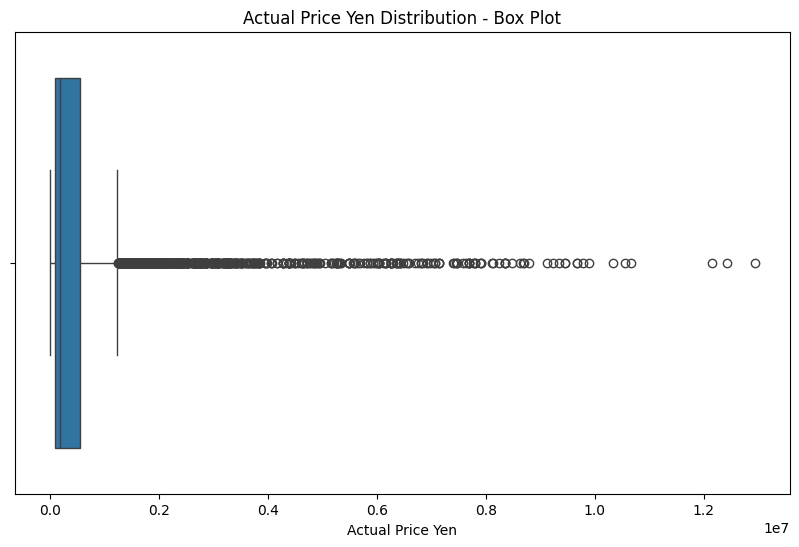

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

# 箱ひげ図の作成
plt.figure(figsize=(10, 6))
sns.boxplot(x=df["actual_price_yen"])
plt.title('Actual Price Yen Distribution - Box Plot')
plt.xlabel('Actual Price Yen')
plt.show()

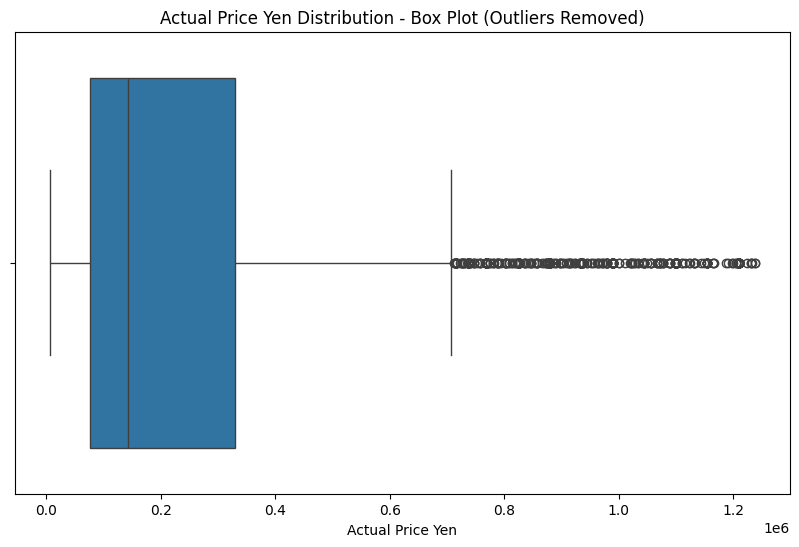

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

# 四分位範囲（IQR）の計算
Q1 = df["actual_price_yen"].quantile(0.25)
Q3 = df["actual_price_yen"].quantile(0.75)
IQR = Q3 - Q1

# 外れ値の閾値を設定
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# 外れ値を除去
filtered_df = df[(df["actual_price_yen"] >= lower_bound) & (df["actual_price_yen"] <= upper_bound)]

# 箱ひげ図の作成
plt.figure(figsize=(10, 6))
sns.boxplot(x=filtered_df["actual_price_yen"])
plt.title('Actual Price Yen Distribution - Box Plot (Outliers Removed)')
plt.xlabel('Actual Price Yen')
plt.show()

253893.55899041283

<Axes: ylabel='actual_price_yen'>

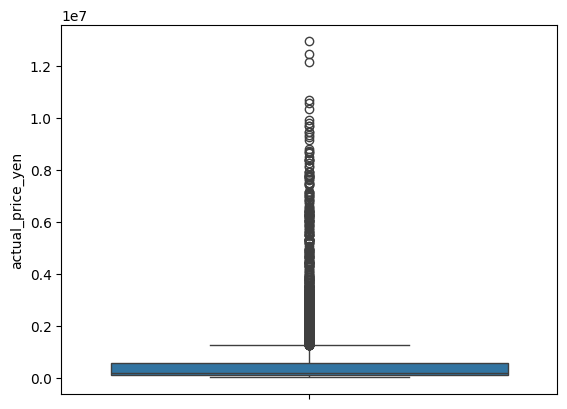

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

df["actual_price_yen"].max()
sns.boxplot(df["actual_price_yen"])

In [41]:
# "actual_price_yen"の平均を計算
mean_price = filtered_df["actual_price_yen"].mean()

# "price_ave"列を追加
filtered_df["price_ave"] = filtered_df["actual_price_yen"].apply(lambda x: 1 if x > mean_price else 0)

   Unnamed: 0                                               name  \
0          72  AmazonBasics High Speed 55 Watt Oscillating Pe...   
1          73  Farberware Mini Blender Fruit Mixer Machine Po...   
2          74  PHILIPS Handheld Garment Steamer STH3000/20 - ...   
3          75  Cookwell Bullet Mixer Grinder (5 Jars, 3 Blade...   
4          76  Bajaj ATX 4 750-Watt Pop-up Toaster, 2-Slice A...   

  main_category    sub_category  \
0    appliances  All Appliances   
1    appliances  All Appliances   
2    appliances  All Appliances   
3    appliances  All Appliances   
4    appliances  All Appliances   

                                               image  \
0  https://m.media-amazon.com/images/I/71QfUcEOg8...   
1  https://m.media-amazon.com/images/I/716mmFt0PG...   
2  https://m.media-amazon.com/images/I/71W2XPQdBq...   
3  https://m.media-amazon.com/images/I/81yobRRV8n...   
4  https://m.media-amazon.com/images/I/51D5T7TGVb...   

                                           

/tmp/ipykernel_9650/1838393123.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df["price_ave"] = filtered_df["actual_price_yen"].apply(lambda x: 1 if x > mean_price else 0)


In [43]:
filtered_df["price_ave"].value_counts()

price_ave
0    3459
1    1652
Name: count, dtype: int64

In [44]:
df = filtered_df.copy()

In [45]:
theta = 0.5
df["output"] = theta * df["price_ave"] + 0.3 * df["no_of_ratings"] + df["embedding"]

In [46]:
df.to_csv("./outputs.csv")

17.064304733276366